Notebook accompanying pbpython article - [Pandas Grouper and Agg Functions Explained](http://pbpython.com/pandas-grouper-agg.html)

In [11]:
import pandas as pd
import collections

Read in the sample sales file then convert the date column to a proper date time column

In [2]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=True")

In [13]:
df["date"] = pd.to_datetime(df['date'])   #date를 datetime 형식으로 바꿈
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [15]:
df.index=df['date']    #인덱스 -1.setindex, 2.재할당

x축이 인덱스

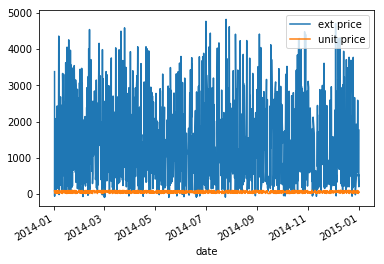

In [22]:
df[['ext price','unit price']].plot.line()  #숫자데이터 아닌애들때문에 에러남, 그래서ㅐ 이렇게해야됌

In [23]:
df[['ext price','unit price']]

,ext price,unit price
date,,
2014-01-01 07:21:51,3380.91,86.69
2014-01-01 10:00:47,-63.16,63.16
2014-01-01 13:24:58,2086.10,90.70
2014-01-01 15:05:22,863.05,21.05
2014-01-01 23:26:55,499.26,83.21
2014-01-02 10:07:15,1489.71,87.63
2014-01-02 10:57:23,62.20,31.10
2014-01-03 06:32:11,266.00,33.25
2014-01-03 11:29:02,1849.98,84.09


In [28]:
df[['ext price','unit price']].resample('W').mean()    #resample 그룹바이랑 비슷함(시간으로 그룹바이할때)

,ext price,unit price
date,,
2014-01-05,1030.653500,59.104000
2014-01-12,1403.903200,54.948800
2014-01-19,1233.583077,50.335385
2014-01-26,1688.040968,59.416774
2014-02-02,1439.747778,49.895556
2014-02-09,1108.736897,50.072414
2014-02-16,1450.805667,55.739000
2014-02-23,1576.945652,63.928696
2014-03-02,1230.309286,57.512143


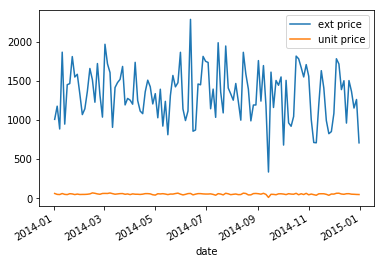

In [32]:

df[['ext price','unit price']].resample('3D').mean().plot.line()   #3D = 3일씩, 시간에 따른 경향

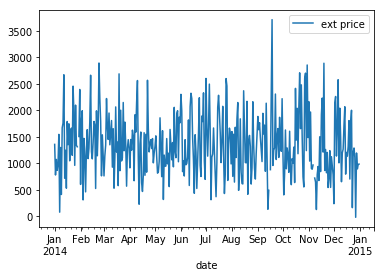

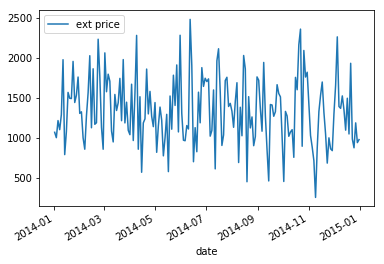

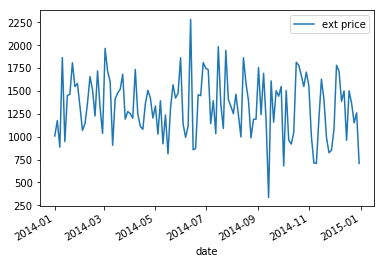

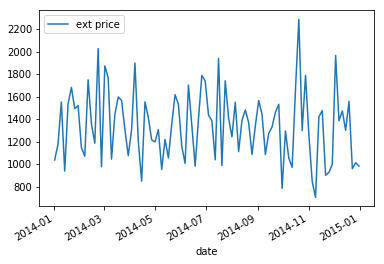

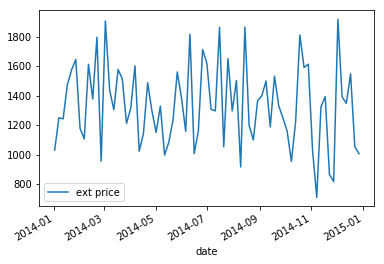

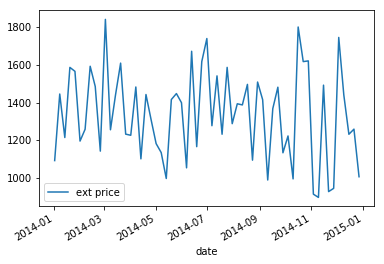

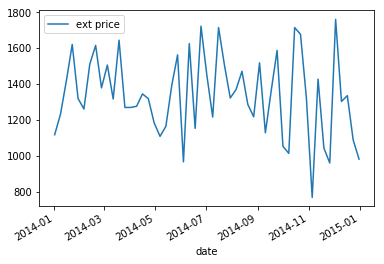

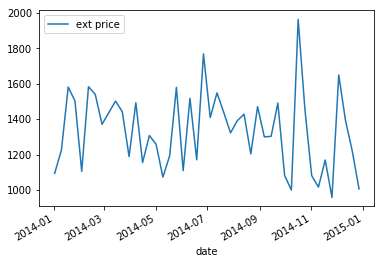

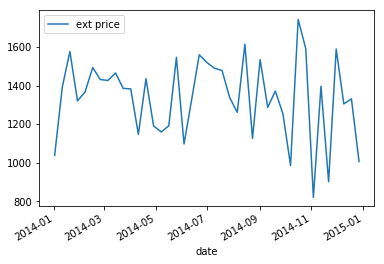

In [34]:
for i in [str(x)+'D' for x in range(1,10)]:
    df[['ext price']].resample(i).mean().plot.line()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1500 entries, 2014-01-01 07:21:51 to 2014-12-31 12:48:35
Data columns (total 7 columns):
account number    1500 non-null int64
name              1500 non-null object
sku               1500 non-null object
quantity          1500 non-null int64
unit price        1500 non-null float64
ext price         1500 non-null float64
date              1500 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 93.8+ KB


In [5]:
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [7]:
df.tail()

,account number,name,sku,quantity,unit price,ext price,date
1495,737550,"Fritsch, Russel and Anderson",S1-06532,12,55.80,669.60,2014-12-30 13:38:13
1496,786968,"Frami, Hills and Schmidt",S1-06532,37,13.14,486.18,2014-12-30 21:42:17
1497,239344,Stokes LLC,S2-10342,14,38.75,542.50,2014-12-30 22:45:19
1498,642753,Pollich LLC,S2-82423,3,65.97,197.91,2014-12-31 10:36:24
1499,383080,Will LLC,S2-00301,38,46.44,1764.72,2014-12-31 12:48:35


In [9]:
df.describe()

,account number,quantity,unit price,ext price
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,485957.841333,24.308667,55.007527,1345.856213
std,223974.044572,14.439265,25.903267,1084.914881
min,141962.000000,-1.000000,10.030000,-97.160000
25%,257198.000000,12.000000,32.500000,472.177500
50%,527099.000000,25.000000,55.465000,1050.390000
75%,714466.000000,37.000000,77.075000,2068.330000
max,786968.000000,49.000000,99.850000,4824.540000


In [10]:
df.sample()

,account number,name,sku,quantity,unit price,ext price,date
1392,729833,Koepp Ltd,B1-20000,6,54.26,325.56,2014-12-05 05:06:28


In [5]:
df.dtypes

account number             int64
name                      object
sku                       object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object

Example showing how resample can be used along with set_index

In [7]:
df.set_index('date').resample('M')["ext price"].sum()   #인덱스는 중복가능해서 시간날짜는 RESAMPLE로 묶는다 M=month, D=day
                                                        #인덱스설정이 중요한건 그래프그릴때 중요해서

date
2014-01-31    185361.66
2014-02-28    146211.62
2014-03-31    203921.38
2014-04-30    174574.11
2014-05-31    165418.55
2014-06-30    174089.33
2014-07-31    191662.11
2014-08-31    153778.59
2014-09-30    168443.17
2014-10-31    171495.32
2014-11-30    119961.22
2014-12-31    163867.26
Freq: M, Name: ext price, dtype: float64

A more complex example with a groupby

In [6]:
df.set_index('date').groupby('name')["ext price"].resample("M").sum().head(20)

name                             date      
Barton LLC                       2014-01-31     6177.57
                                 2014-02-28    12218.03
                                 2014-03-31     3513.53
                                 2014-04-30    11474.20
                                 2014-05-31    10220.17
                                 2014-06-30    10463.73
                                 2014-07-31     6750.48
                                 2014-08-31    17541.46
                                 2014-09-30    14053.61
                                 2014-10-31     9351.68
                                 2014-11-30     4901.14
                                 2014-12-31     2772.90
Cronin, Oberbrunner and Spencer  2014-01-31     1141.75
                                 2014-02-28    13976.26
                                 2014-03-31    11691.62
                                 2014-04-30     3685.44
                                 2014-05-31     6760.11
    

A simpler example using pd.Grouper

In [7]:
df.groupby(['name', pd.Grouper(key='date', freq='M')])['ext price'].sum().head(20)
pd.Grouper

name                             date      
Barton LLC                       2014-01-31     6177.57
                                 2014-02-28    12218.03
                                 2014-03-31     3513.53
                                 2014-04-30    11474.20
                                 2014-05-31    10220.17
                                 2014-06-30    10463.73
                                 2014-07-31     6750.48
                                 2014-08-31    17541.46
                                 2014-09-30    14053.61
                                 2014-10-31     9351.68
                                 2014-11-30     4901.14
                                 2014-12-31     2772.90
Cronin, Oberbrunner and Spencer  2014-01-31     1141.75
                                 2014-02-28    13976.26
                                 2014-03-31    11691.62
                                 2014-04-30     3685.44
                                 2014-05-31     6760.11
    

In [35]:
df.groupby(['name', pd.Grouper(key='date', freq='A-DEC')])['ext price'].sum()    #reset index로 groupby풀고 한다

#A-year , dec=december

name                             date      
Barton LLC                       2014-12-31    109438.50
Cronin, Oberbrunner and Spencer  2014-12-31     89734.55
Frami, Hills and Schmidt         2014-12-31    103569.59
Fritsch, Russel and Anderson     2014-12-31    112214.71
Halvorson, Crona and Champlin    2014-12-31     70004.36
Herman LLC                       2014-12-31     82865.00
Jerde-Hilpert                    2014-12-31    112591.43
Kassulke, Ondricka and Metz      2014-12-31     86451.07
Keeling LLC                      2014-12-31    100934.30
Kiehn-Spinka                     2014-12-31     99608.77
Koepp Ltd                        2014-12-31    103660.54
Kuhn-Gusikowski                  2014-12-31     91094.28
Kulas Inc                        2014-12-31    137351.96
Pollich LLC                      2014-12-31     87347.18
Purdy-Kunde                      2014-12-31     77898.21
Sanford and Sons                 2014-12-31     98822.98
Stokes LLC                       2014-12-31 

In [9]:
# This works but is kind of slow and probably not that useful for this data set
#df.groupby(['name', pd.Grouper(key='date', freq='60s')])['ext price'].sum()

Some more examples using various off set alisases - http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

In [10]:
df.groupby(['name', pd.Grouper(key='date', freq='W-MON')])['ext price'].sum()

name        date      
Barton LLC  2014-01-06    3380.91
            2014-01-20     224.86
            2014-01-27    2423.96
            2014-02-03     147.84
            2014-02-10     217.14
            2014-02-17    8442.09
            2014-03-03    3558.80
            2014-03-10    1763.49
            2014-03-17    1750.04
            2014-04-07    1561.14
            2014-04-14    4702.61
            2014-04-21     836.63
            2014-04-28    2540.79
            2014-05-05    4109.99
            2014-05-12    1671.83
            2014-05-26    3251.43
            2014-06-02    6112.87
            2014-06-09     677.35
            2014-06-16    2798.00
            2014-06-23    3895.46
            2014-07-14    1033.26
            2014-07-21    3989.22
            2014-08-04    7384.80
            2014-08-11      84.18
            2014-08-18    3857.10
            2014-08-25    2925.94
            2014-09-01    5017.44
            2014-09-08    1319.28
            2014-09-15   

In [36]:
df.groupby(['name', 'sku', pd.Grouper(key='date', freq='A-DEC')])['ext price'].sum()  #그룹퍼 -리셈플대신쓰는데 더디테일

name                             sku       date      
Barton LLC                       B1-04202  2014-12-31     2433.20
                                 B1-05914  2014-12-31      324.72
                                 B1-20000  2014-12-31     7212.11
                                 B1-33087  2014-12-31     4159.97
                                 B1-33364  2014-12-31     4369.19
                                 B1-38851  2014-12-31     6627.93
                                 B1-50809  2014-12-31     5087.44
                                 B1-53102  2014-12-31      431.27
                                 B1-53636  2014-12-31     3737.59
                                 B1-65551  2014-12-31     4703.54
                                 B1-69924  2014-12-31     1634.29
                                 B1-86481  2014-12-31     1457.80
                                 S1-06532  2014-12-31     8346.20
                                 S1-27722  2014-12-31     5840.43
                      

Now show how to use the new .agg function

First, how to get summary stats without agg

In [10]:
df[["ext price", "quantity"]].sum()       # 넘파이 괄호두개는 펜시인덱싱,  판다스는 데이터프레임

ext price    2018784.32
quantity       36463.00
dtype: float64

In [13]:
df[["ext price", "quantity"]].mean()     

ext price    1345.856213
quantity       24.308667
dtype: float64

Using .agg for sums and means across multiple columns

In [12]:
df[["ext price", "quantity", "unit price"]].agg(['sum', 'mean'])  # mapping : {'a':1}  => a를1로 맵핑한다

,ext price,quantity,unit price
sum,2.018784e+06,36463.000000,82511.290000
mean,1.345856e+03,24.308667,55.007527


Passing a dictionary containing different operations per column

In [14]:
df.agg({'ext price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit price': ['mean']})   #sort(멜트에서 인덱스바뀐거 처리할때)

,ext price,quantity,unit price
mean,1.345856e+03,24.308667,55.007527
sum,2.018784e+06,36463.000000,NaN


Using custom functions

In [16]:
get_max = lambda x: x.value_counts(dropna=False).index[0]

In [17]:
df.agg({'ext price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit price': ['mean'], 'sku': [get_max]})

,ext price,quantity,unit price,sku
<lambda>,NaN,NaN,NaN,S2-77896
mean,1.345856e+03,24.308667,55.007527,NaN
sum,2.018784e+06,36463.000000,NaN,NaN


Clean up the naming in the output by defining the name for get_max

In [16]:
get_max.__name__ = "most frequent"

NameError: name 'get_max' is not defined

In [19]:
df.agg({'ext price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit price': ['mean'], 'sku': [get_max]})

,ext price,quantity,unit price,sku
mean,1.345856e+03,24.308667,55.007527,NaN
most frequent,NaN,NaN,NaN,S2-77896
sum,2.018784e+06,36463.000000,NaN,NaN


Using an OrderedDictionary to maintain column order

# odereddict 중요함 -입력된순서대로 순서정해짐

In [15]:
f = collections.OrderedDict([('ext price', ['sum', 'mean']), ('quantity', ['sum', 'mean']), ('sku', [get_max])])  #지금은 안써도됌

NameError: name 'get_max' is not defined

In [21]:
df.agg(f)

,ext price,quantity,sku
mean,1.345856e+03,24.308667,NaN
most frequent,NaN,NaN,S2-77896
sum,2.018784e+06,36463.000000,NaN


defaultdict = 없는거쳤을때 에러가안나고 값을줌